In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
return_dict = evolve(
    run_name = 'test',
    z_start = 45.,
    z_end = 35.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='phot_delta',
        m_DM=1e10,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = False,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om(0),
            OMb = Planck18.Ob(0),
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = False,
    use_tqdm = True,
)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial condi

In [3]:
return_dict['profiler'].print_summary()

xray: 2.0533 +/- 0.5555 s
bath+dm: 0.0694 +/- 0.0035 s
21cmFAST: 0.0370 +/- 0.0090 s
prep_next: 0.0876 +/- 0.0368 s


<Axes: xlabel='Iteration', ylabel='Time [s]'>

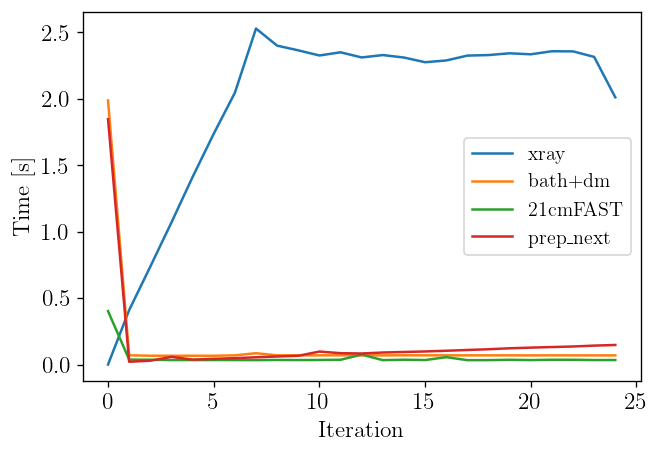

In [4]:
return_dict['profiler'].plot()

In [12]:
import numpy as np
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../matplotlibrc")

[]

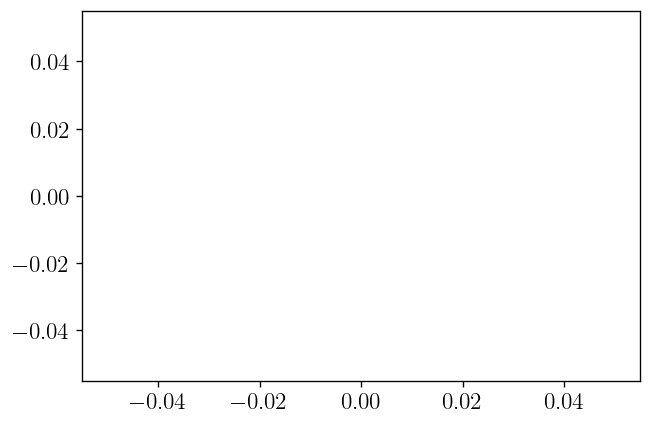

In [13]:
plt.plot()

In [5]:
ar0 = pickle.load(open("../outputs/tmp/records_test.p", 'rb'))
ar0 = {k: np.array([r[k] for r in ar0]) for k in ar0[0].keys()}

In [8]:
ar = np.load("../data/run_info/test_records.npy", allow_pickle=True).item()

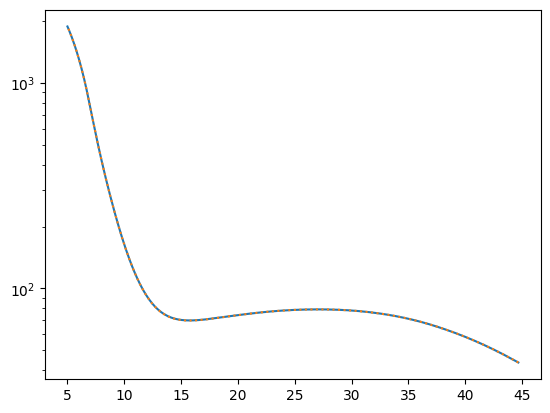

In [10]:
plt.plot(ar['z'], ar['T_k'])
plt.plot(ar0['z'], ar0['T_k'], ':')
plt.yscale('log')